In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../Data/complete_data_gt.csv')

In [3]:
df.head()

,img_id,tort,dm,ip,tp,sd,Class
0,E_1193671_Jandyal_sourabh__1193671_19951205_Ma...,0.010986,1.271061,"[[117, 190]]",1,40.656315,E
1,E_1193671_Jandyal_sourabh__1193671_19951205_Ma...,0.029837,1.429713,"[[68, 155]]",1,47.821673,E
2,E_1193671_Jandyal_sourabh__1193671_19951205_Ma...,0.000128,0.007949,"[[66, 184], [66, 184], [69, 196]]",0,6.732093,E
3,E_1193671_Jandyal_sourabh__1193671_19951205_Ma...,0.005239,0.546280,"[[169, 146], [172, 153], [161, 163], [145, 162...",4,35.483763,E
4,E_1193671_Jandyal_sourabh__1193671_19951205_Ma...,0.000000,0.002074,[],0,3.692631,E


In [4]:
df.Class.value_counts()

H    643
E    588
M    501
Name: Class, dtype: int64

## Adding a Column for Inflection Points

In [5]:
df['num_ip'] = 0
for i in range(df.shape[0]):
    temp = df['ip'].iloc[i][1:-1]
    c = 0
    for j in temp:
        if j=='[':
            c+=1
    df['num_ip'].iloc[i] = c

/home/arnav0400/.local/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
df = df.dropna()
df = df[df.num_ip<20]

In [7]:
# df.columns = ['img_id', 'grisan_index', 'distance_measure', 'inflection_points', 'num_turning_points', 'standard_deviation', 'Class', 'num_inflection_points']

## Turning Points

In [36]:
df

,img_id,tort,dm,ip,tp,sd,Class,num_ip
0,E_1193671_Jandyal_sourabh__1193671_19951205_Ma...,0.010986,1.271061,"[[117, 190]]",1,40.656315,E,1
1,E_1193671_Jandyal_sourabh__1193671_19951205_Ma...,0.029837,1.429713,"[[68, 155]]",1,47.821673,E,1
2,E_1193671_Jandyal_sourabh__1193671_19951205_Ma...,0.000128,0.007949,"[[66, 184], [66, 184], [69, 196]]",0,6.732093,E,3
3,E_1193671_Jandyal_sourabh__1193671_19951205_Ma...,0.005239,0.546280,"[[169, 146], [172, 153], [161, 163], [145, 162...",4,35.483763,E,5
4,E_1193671_Jandyal_sourabh__1193671_19951205_Ma...,0.000000,0.002074,[],0,3.692631,E,0
...,...,...,...,...,...,...,...,...
1727,M_Gnanapoonkodi_B__4259046_19960225_Female_OD.jpg,0.000553,0.049637,"[[57, 16], [59, 23], [60, 35], [59, 45], [56, ...",2,69.915315,M,6
1728,M_Gnanapoonkodi_B__4259046_19960225_Female_OD.jpg,0.000000,0.000002,[],0,0.123715,M,0
1729,M_Gnanapoonkodi_B__4259046_19960225_Female_OD.jpg,0.000500,0.019512,"[[65, 29], [86, 34]]",0,11.581133,M,2
1730,M_Gnanapoonkodi_B__4259046_19960225_Female_OD.jpg,0.005078,0.833509,"[[99, 23], [97, 53]]",5,44.870405,M,2


In [37]:
max_df = df.groupby('img_id').max()

In [38]:
sum_df = df.groupby('img_id').sum()

In [39]:
sum_df['Class'] = max_df.Class

In [40]:
max_df.groupby('Class').mean().iloc[:,1:]

,dm,tp,sd,num_ip
Class,,,,
E,2.349594,6.250000,77.665892,8.100000
H,5.833943,8.150000,78.286063,9.700000
M,4.740114,7.789474,76.776705,8.684211


In [43]:
sum_df.groupby('Class').mean()

,dm,tp,sd,num_ip
Class,,,,
E,11.837250,41.850000,831.181210,68.90
H,18.640651,56.150000,974.756162,79.05
M,13.833694,46.631579,849.722009,73.00


In [44]:
sum_df.to_csv('sum.csv')
max_df.to_csv('max.csv')

In [83]:
df[df.Class=='E'].groupby(['img_id']).sum().dm.mean()

11.83725002718901

In [84]:
df[df.Class=='H'].groupby(['img_id']).sum().dm.mean()

18.6406507597282

In [85]:
df[df.Class=='M'].groupby(['img_id']).sum().dm.mean()

13.833694152756205

### Per Image - Total number

In [69]:
tp_per_image = df.groupby(['Class', 'img_id']).tp.sum()

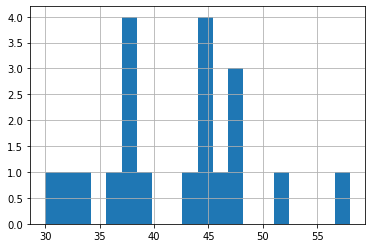

In [70]:
tp_per_image.loc['E'].hist(bins=20)

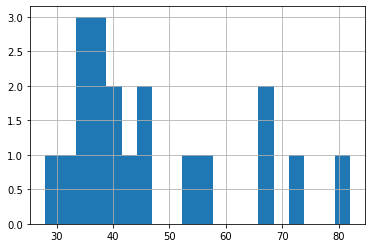

In [71]:
tp_per_image.loc['M'].hist(bins=20)

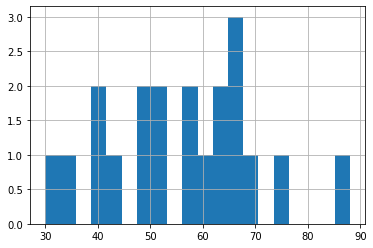

In [72]:
tp_per_image.loc['H'].hist(bins=20)

### Per Image - Max Per Vessel

In [73]:
tp_per_vessel = df.groupby(['Class', 'img_id']).tp.max()

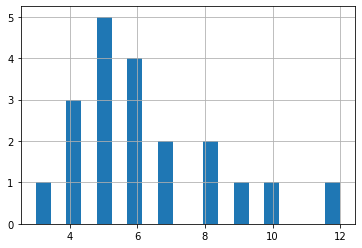

In [74]:
tp_per_vessel.loc['E'].hist(bins=20)

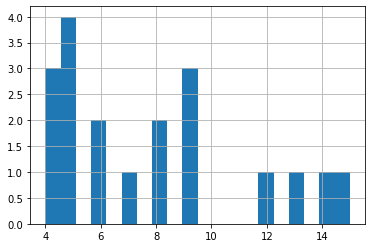

In [75]:
tp_per_vessel.loc['M'].hist(bins=20)

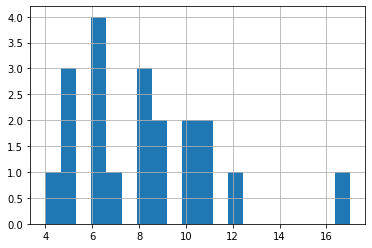

In [76]:
tp_per_vessel.loc['H'].hist(bins=20)

### Per Image - Mean per vessel

In [77]:
tp_per_vessel = df.groupby(['Class', 'img_id']).tp.mean()

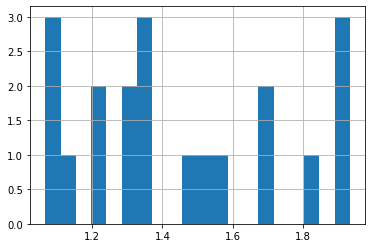

In [78]:
tp_per_vessel.loc['E'].hist(bins=20)

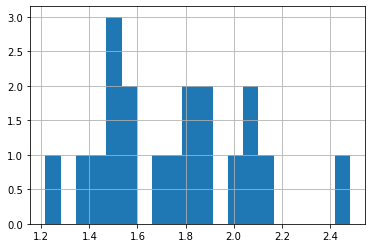

In [79]:
tp_per_vessel.loc['M'].hist(bins=20)

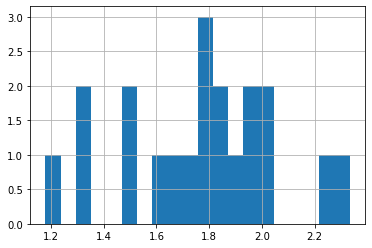

In [80]:
tp_per_vessel.loc['H'].hist(bins=20)

## Distance Measure

### Max Classwise

In [81]:
dp_class_wise = df.groupby(['Class']).dm.max()

In [82]:
dp_class_wise

Class
E    10.039999
H    38.550652
M    36.251147
Name: dm, dtype: float64

### Mean Classwise

In [83]:
dp_class_wise = df.groupby(['Class']).dm.mean()

In [84]:
dp_class_wise

Class
E    0.404692
H    0.583432
M    0.524631
Name: dm, dtype: float64

### Per Image - Mean per vessel

In [85]:
dm_per_image = df.groupby(['Class', 'img_id']).dm.mean()

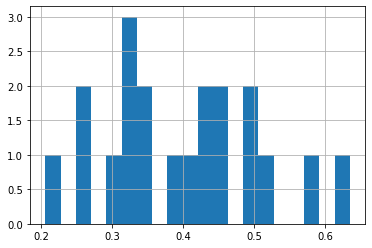

In [86]:
dm_per_image.loc['E'].hist(bins=20)

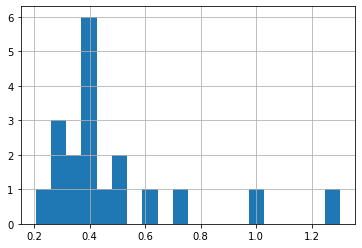

In [87]:
dm_per_image.loc['M'].hist(bins=20)

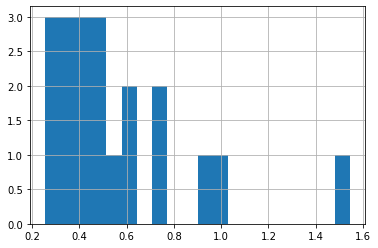

In [88]:
dm_per_image.loc['H'].hist(bins=20)

### Per Image - Max per vessel

In [89]:
dm_per_image = df.groupby(['Class', 'img_id']).dm.max()

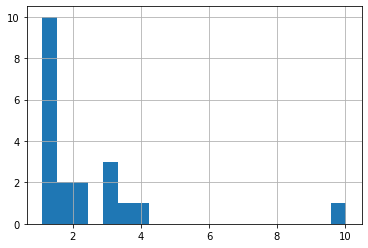

In [90]:
dm_per_image.loc['E'].hist(bins=20)

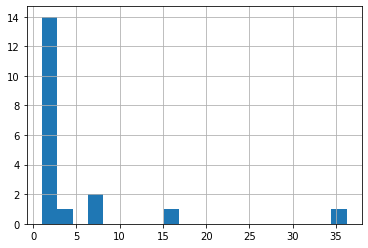

In [91]:
dm_per_image.loc['M'].hist(bins=20)

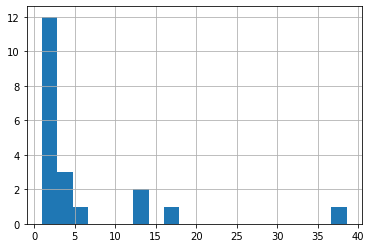

In [92]:
dm_per_image.loc['H'].hist(bins=20)

## Number of Inflection Points

### Calculating number of inflection points

In [93]:
numip_per_image = df.groupby(['Class', 'img_id']).num_ip.sum()

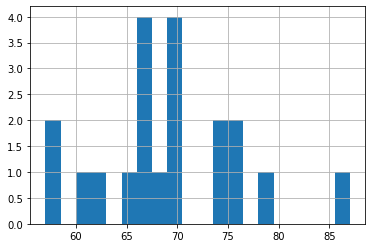

In [94]:
numip_per_image.loc['E'].hist(bins=20)

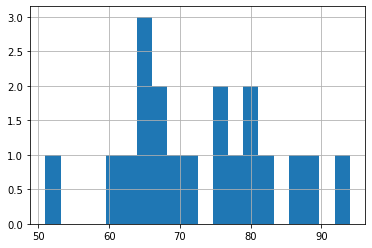

In [95]:
numip_per_image.loc['M'].hist(bins=20)

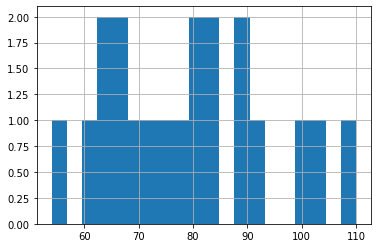

In [96]:
numip_per_image.loc['H'].hist(bins=20)